# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Ikhsan Nur Rahman
- **Email:** ikhsaninr@gmail.com
- **ID Dicoding:** ikhsaninr

## Menentukan Pertanyaan Bisnis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pertanyaan 1. Bagaimana tren kualitas udara di Gucheng selama periode 2013-2017?


Pertanyaan 2. Bagaimana hubungan antara polutan utama (PM2.5, PM10) dengan faktor cuaca (suhu, tekanan, kelembaban)?


Pertanyaan 3. Apakah ada pola musiman dalam tingkat polusi udara?


Pertanyaan 4. Bagaimana pengaruh arah dan kecepatan angin terhadap tingkat polusi?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [ ]:
df_aotizhongxin=pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv')





In [ ]:
#lihat sample data
df_aotizhongxin.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
print(df_aotizhongxin.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


**Insight:**
- Terdapat data kualitas udara dari 1 stasiun yaitu aotizhongxin
- Data kualiatas udara teridi dari data: 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'

### Assessing Data

Cek jumlah data

In [ ]:
print("banyak data kualitas udara stasiun aotizhongxin:",len(df_aotizhongxin.index))

banyak data kualitas udara stasiun aotizhongxin: 35064


In [ ]:
Cek missing values data

In [ ]:
missing_values=df_aotizhongxin.isnull().sum()

In [ ]:
display(missing_values[missing_values > 0])


,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776
O3,1719
TEMP,20
PRES,20
DEWP,20
RAIN,20


Cek Sampel Tipe Data Setiap Kolom

In [ ]:
df_aotizhongxin.dtypes

,0
No,int64
year,int64
month,int64
day,int64
hour,int64
PM2.5,float64
PM10,float64
SO2,float64
NO2,float64
CO,float64


**Insight:**
- Terdapat 12 kolom yang memiliki missing value, 6 kolom terkait polutan menempati jumlah missing teratas > 700
- Value data mayoritas dalam bentuk number

### Cleaning Data

In [ ]:
# Handle missing values (drop rows dengan nilai NaN pada kolom utama)
df_aotizhongxin = df_aotizhongxin.dropna(subset=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'])

**Insight:**
1. Polutan utama seperti PM2.5, PM10, SO2, NO2, CO, O3 adalah variabel kunci dalam analisis ini. Jika banyak data hilang pada kolom ini, bisa menyebabkan hasil analisis tidak akurat.
2. Menghapus data yang tidak lengkap lebih baik dibandingkan mengganti nilai dengan rata-rata (imputasi), karena polusi udara bisa sangat bervariasi tergantung kondisi lingkungan.


## Exploratory Data Analysis (EDA)

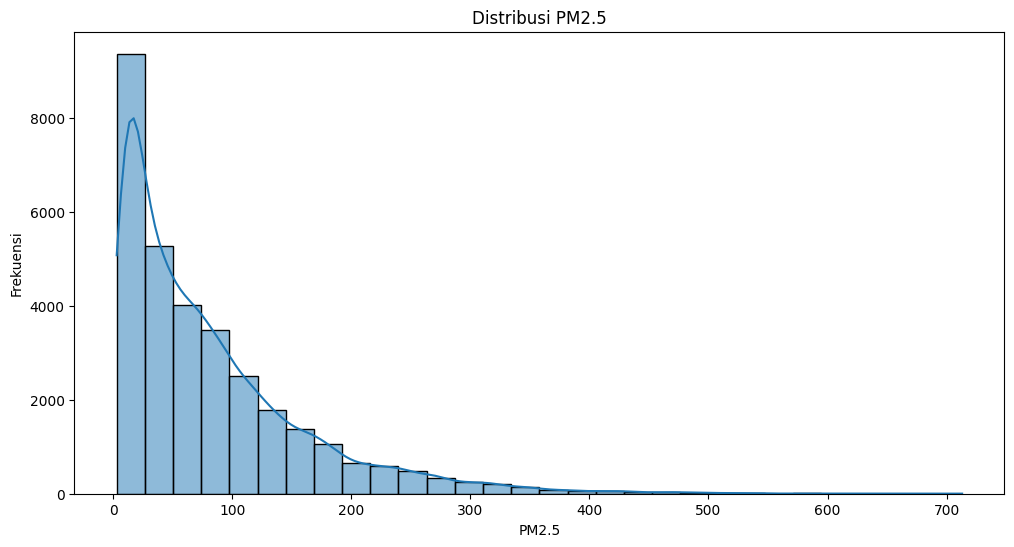

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df_aotizhongxin['PM2.5'], bins=30, kde=True)
plt.title('Distribusi PM2.5')
plt.xlabel('PM2.5')
plt.ylabel('Frekuensi')
plt.show()

# Analisis hasil: Histplot PM2.5 menunjukkan distribusi data polusi udara.
# Jika distribusi miring ke kanan (right-skewed), berarti ada beberapa kejadian polusi ekstrem

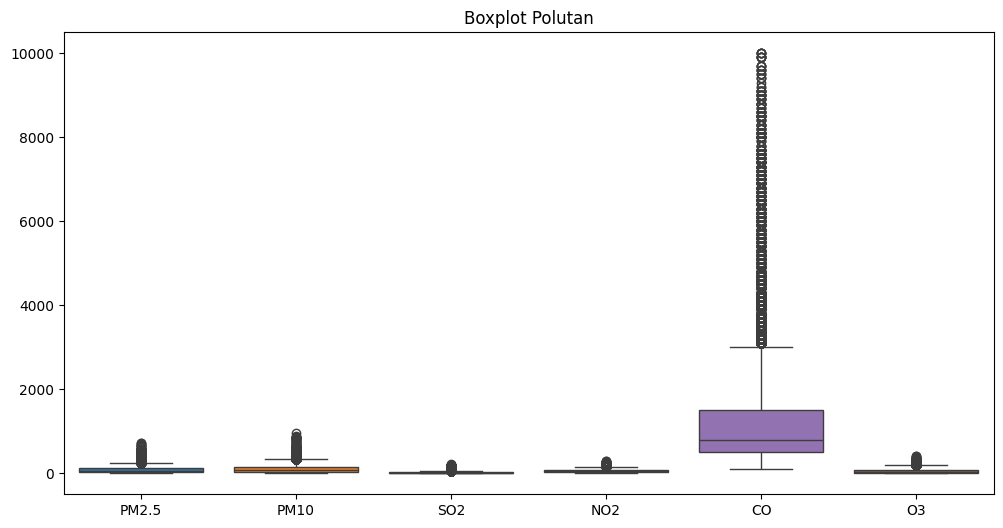

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_aotizhongxin[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']])
plt.title('Boxplot Polutan')
plt.show()

**Insight:**
- Analisis hasil: Boxplot menunjukkan outlier dalam data polusi udara.
- Jika ada titik-titik di luar whisker, berarti ada hari-hari dengan polusi sangat tinggi dibanding hari lainnya.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Kualitas Udara dari 2013-2017

Pada Analisa akan dibatasi hanya pada Polutan PM2.5 dan PM10 yang merupakan Polutan Udara yang Paling Berbahaya

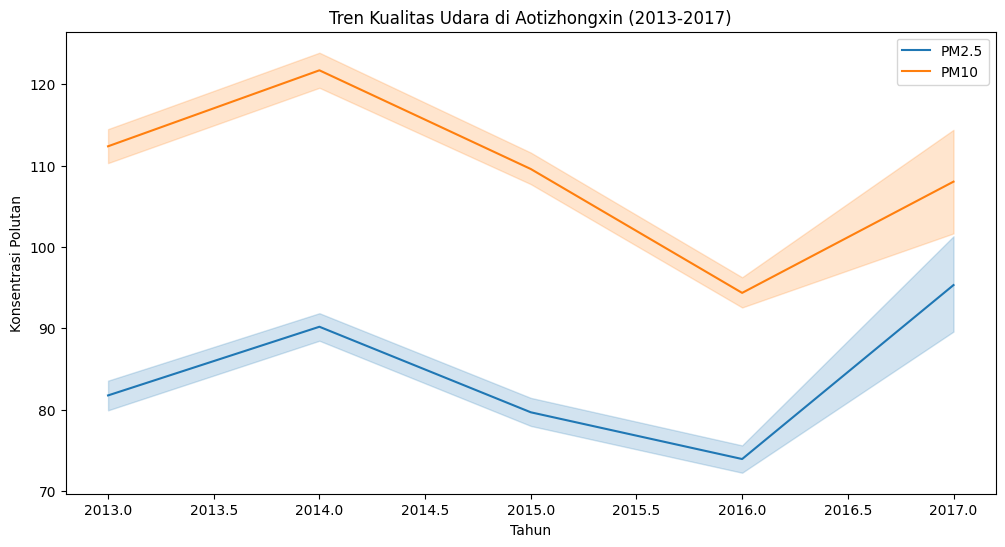

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_aotizhongxin, x='year', y='PM2.5', label='PM2.5')
sns.lineplot(data=df_aotizhongxin, x='year', y='PM10', label='PM10')
plt.title('Tren Kualitas Udara di Aotizhongxin (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Polutan')
plt.legend()
plt.show()

### Pertanyaan 2: Hubungan PM2.5 & PM10 dengan Faktor Cuaca

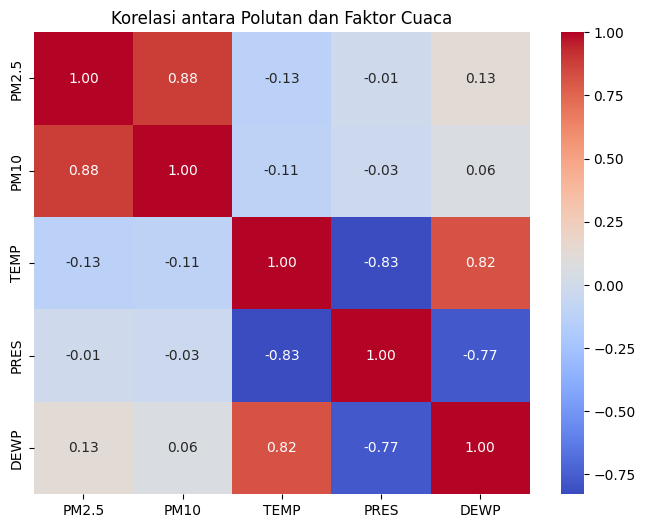

In [ ]:
correlation_matrix = df_aotizhongxin[['PM2.5', 'PM10', 'TEMP', 'PRES', 'DEWP']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Polutan dan Faktor Cuaca')
plt.show()

**Insight:**
 Analisis hasil heatmap korelasi:
 - PM2.5 dan PM10 memiliki korelasi tinggi satu sama lain, menunjukkan bahwa mereka sering muncul bersamaan.
 - Temperatur (TEMP) memiliki korelasi negatif mendekati 0 dengan PM2.5 dan PM10, artinya tidak memiliki korelasi (no correlation).
 - Tekanan udara (PRES) menunjukkan korelasi negatif mendekati 0 dengan polusi, menunjukkan tidak memiliki korelasi (no correlation).
 - Titik embun (DEWP) memiliki korelasi positif mendekati 0, yang berarti tidak memiliki korelasi (no correlation).


## Analisis Lanjutan (Opsional)

Pertanyaan 3: Pola Musiman dalam Tingkat Polusi

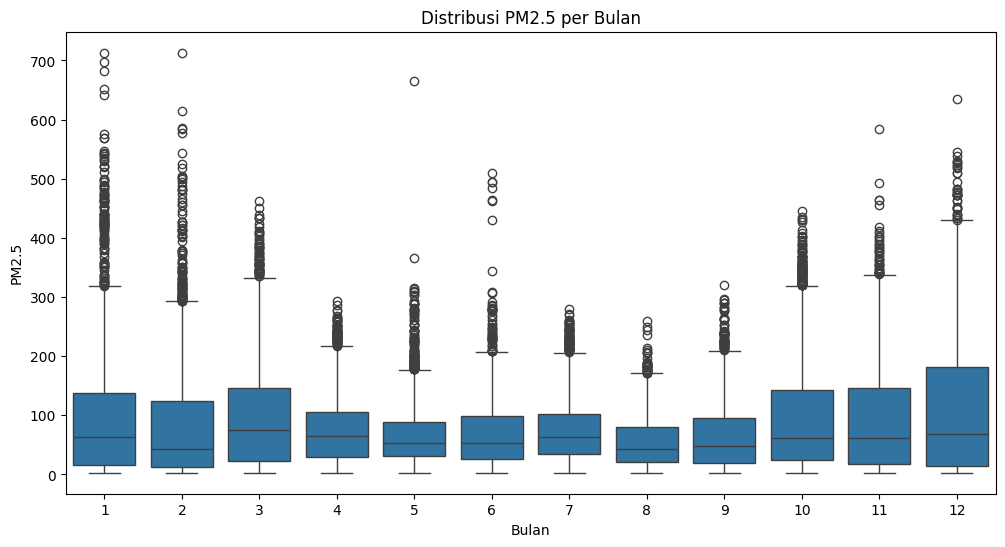

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_aotizhongxin, x='month', y='PM2.5')
plt.title('Distribusi PM2.5 per Bulan')
plt.xlabel('Bulan')
plt.ylabel('PM2.5')
plt.show()

Pertanyaan 4: Pengaruh Arah dan Kecepatan Angin terhadap Polusi

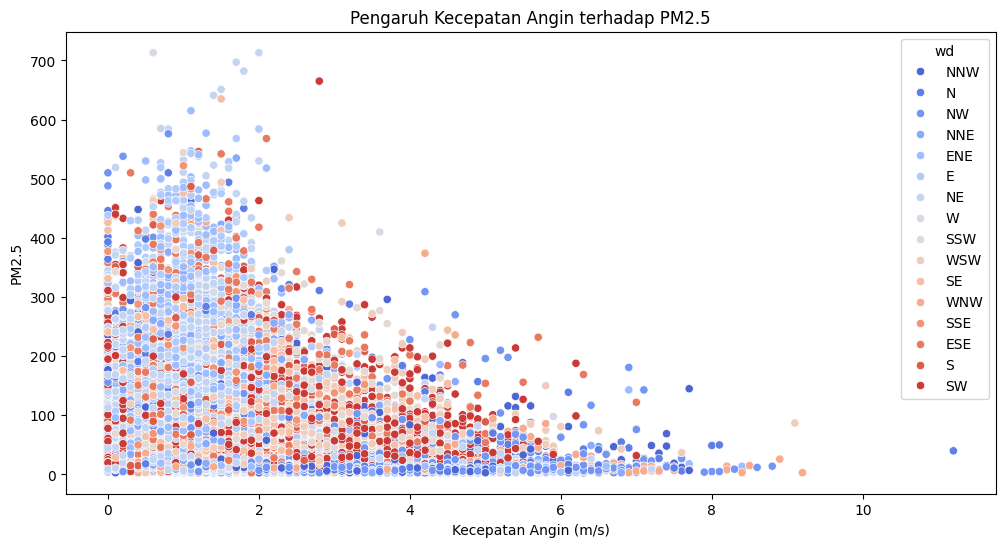

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_aotizhongxin, x='WSPM', y='PM2.5', hue='wd', palette='coolwarm')
plt.title('Pengaruh Kecepatan Angin terhadap PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('PM2.5')
plt.show()

## Conclusion

In [ ]:
print("\nKesimpulan:")
print("1. Tren polusi udara berfluktuasi selama 2013 sampai 2016 namun cenderung menurun, kemudian meningkat kembali dari 2016 ke 2017.")
print("2. Tidak adanya korelasi antara polutan dan faktor cuaca.")
print("3. Pada bulan 12 memiliki tingkat polusi lebih tinggi.")
print("4. Kecepatan Angin berpengaruh terhadap penyebaran polutan, semakin rendah kecepatan penyebaran semakin tinggi.")


Kesimpulan:
1. Tren polusi udara berfluktuasi selama 2013 sampai 2016 namun cenderung menurun, kemudian meningkat kembali dari 2016 ke 2017.
2. Tidak adanya korelasi antara polutan dan faktor cuaca.
3. Pada bulan 12 memiliki tingkat polusi lebih tinggi.
4. Kecepatan Angin berpengaruh terhadap penyebaran polutan, semakin rendah kecepatan penyebaran semakin tinggi.
